# Day 2 - Decision Tree Regressor "classifier" (Optional)
Interestingly, you can use the [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) to do classification tasks as well

But instead of an integer of the specific class you would get a float as the predicted label.

You will use the dataset in *"diabetes.csv"*. It has several health related columns and the outcome of a diabetes test.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics


### Build a classifier

#### 1. Read diabetes data.

In [3]:
df = pd.read_csv('diabetes.csv')
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)

Dataset shape: (768, 9)

First few rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Data types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float

#### 2. Explore and visualize data. Make conclusions.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Basic Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469     

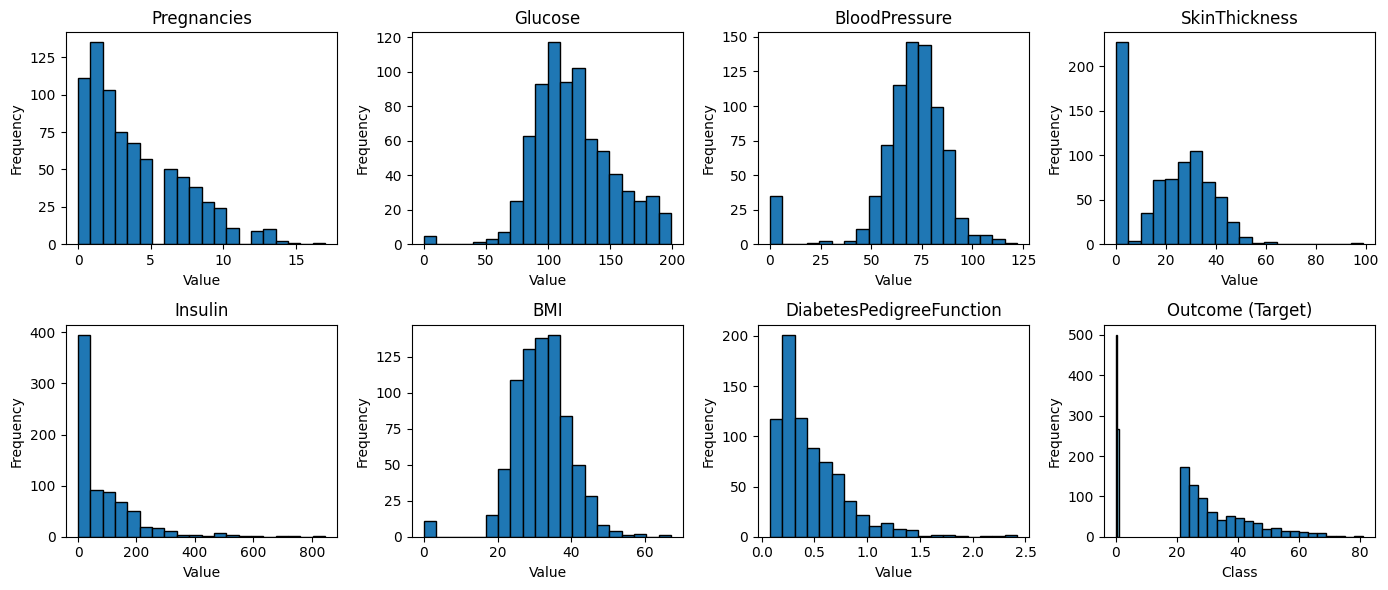


Outcome distribution:
Outcome
0    500
1    268
Name: count, dtype: int64

0 = No Diabetes, 1 = Diabetes


In [4]:
print("Dataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())

plt.figure(figsize=(14, 6))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 4, i)
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.subplot(2, 4, 8)
plt.hist(df['Outcome'], bins=2, edgecolor='black', color=['skyblue'])
plt.title('Outcome (Target)')
plt.xlabel('Class')
plt.tight_layout()
plt.show()

print("\nOutcome distribution:")
print(df['Outcome'].value_counts())
print("\n0 = No Diabetes, 1 = Diabetes")

#### 3. Split the dataset in labels and features.

In [5]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature columns:", X.columns.tolist())

Features shape: (768, 8)
Target shape: (768,)

Feature columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


#### 4. Split the dataset in training and test set (80% and 20%).

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"\nTraining set ratio: {X_train.shape[0] / len(X) * 100:.1f}%")
print(f"Test set ratio: {X_test.shape[0] / len(X) * 100:.1f}%")

Training set size: 614
Test set size: 154

Training set ratio: 79.9%
Test set ratio: 20.1%


#### 5. Build a decision tree with some parameters for max depth and min samples and any of gini or entropy.

In [7]:
dt_regressor = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion='squared_error',
    random_state=17
)

dt_regressor.fit(X_train, y_train)

print("DecisionTreeRegressor trained successfully!")
print(f"Tree depth: {dt_regressor.get_depth()}")
print(f"Number of leaves: {dt_regressor.get_n_leaves()}")
print(f"\nTree parameters:")
print(f"  - max_depth: {dt_regressor.max_depth}")
print(f"  - min_samples_split: {dt_regressor.min_samples_split}")
print(f"  - min_samples_leaf: {dt_regressor.min_samples_leaf}")

DecisionTreeRegressor trained successfully!
Tree depth: 5
Number of leaves: 21

Tree parameters:
  - max_depth: 5
  - min_samples_split: 10
  - min_samples_leaf: 5


#### 6. Provide predictions for test set.

In [8]:
y_pred = dt_regressor.predict(X_test)
y_pred_class = (y_pred >= 0.5).astype(int)

print("Sample predictions (first 10):")
print("\nActual vs Predicted (as float):")
for i in range(10):
    print(f"Actual: {y_test.iloc[i]}, Predicted (float): {y_pred[i]:.3f}, Predicted (class): {y_pred_class[i]}")

Sample predictions (first 10):

Actual vs Predicted (as float):
Actual: 0, Predicted (float): 0.055, Predicted (class): 0
Actual: 1, Predicted (float): 0.852, Predicted (class): 1
Actual: 0, Predicted (float): 0.000, Predicted (class): 0
Actual: 0, Predicted (float): 0.055, Predicted (class): 0
Actual: 0, Predicted (float): 0.111, Predicted (class): 0
Actual: 0, Predicted (float): 0.611, Predicted (class): 1
Actual: 0, Predicted (float): 0.055, Predicted (class): 0
Actual: 1, Predicted (float): 0.957, Predicted (class): 1
Actual: 1, Predicted (float): 0.400, Predicted (class): 0
Actual: 1, Predicted (float): 0.852, Predicted (class): 1


#### 7. Evaluate results.

REGRESSION METRICS
MSE:  0.1978
RMSE: 0.4448
MAE:  0.3158
R²:   0.1515

CLASSIFICATION METRICS (threshold = 0.5)
Accuracy:  0.7143
Precision: 0.6140
Recall:    0.6140
F1 Score:  0.6140

Confusion Matrix:
[[75 22]
 [22 35]]


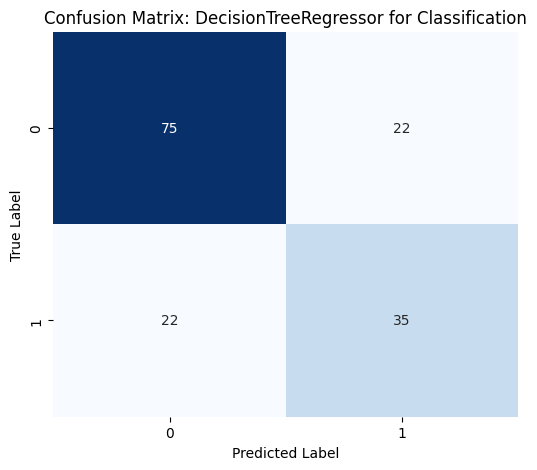

In [9]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("=" * 60)
print("REGRESSION METRICS")
print("=" * 60)
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")

accuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class)
recall = metrics.recall_score(y_test, y_pred_class)
f1 = metrics.f1_score(y_test, y_pred_class)

print("\n" + "=" * 60)
print("CLASSIFICATION METRICS (threshold = 0.5)")
print("=" * 60)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

cm = metrics.confusion_matrix(y_test, y_pred_class)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: DecisionTreeRegressor for Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

#### 8. Visualize tree.

Use plot tree to visualize the tree. You can use figsize inside of plt.figure to control the size of the visualization.



In [10]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
from sklearn import tree

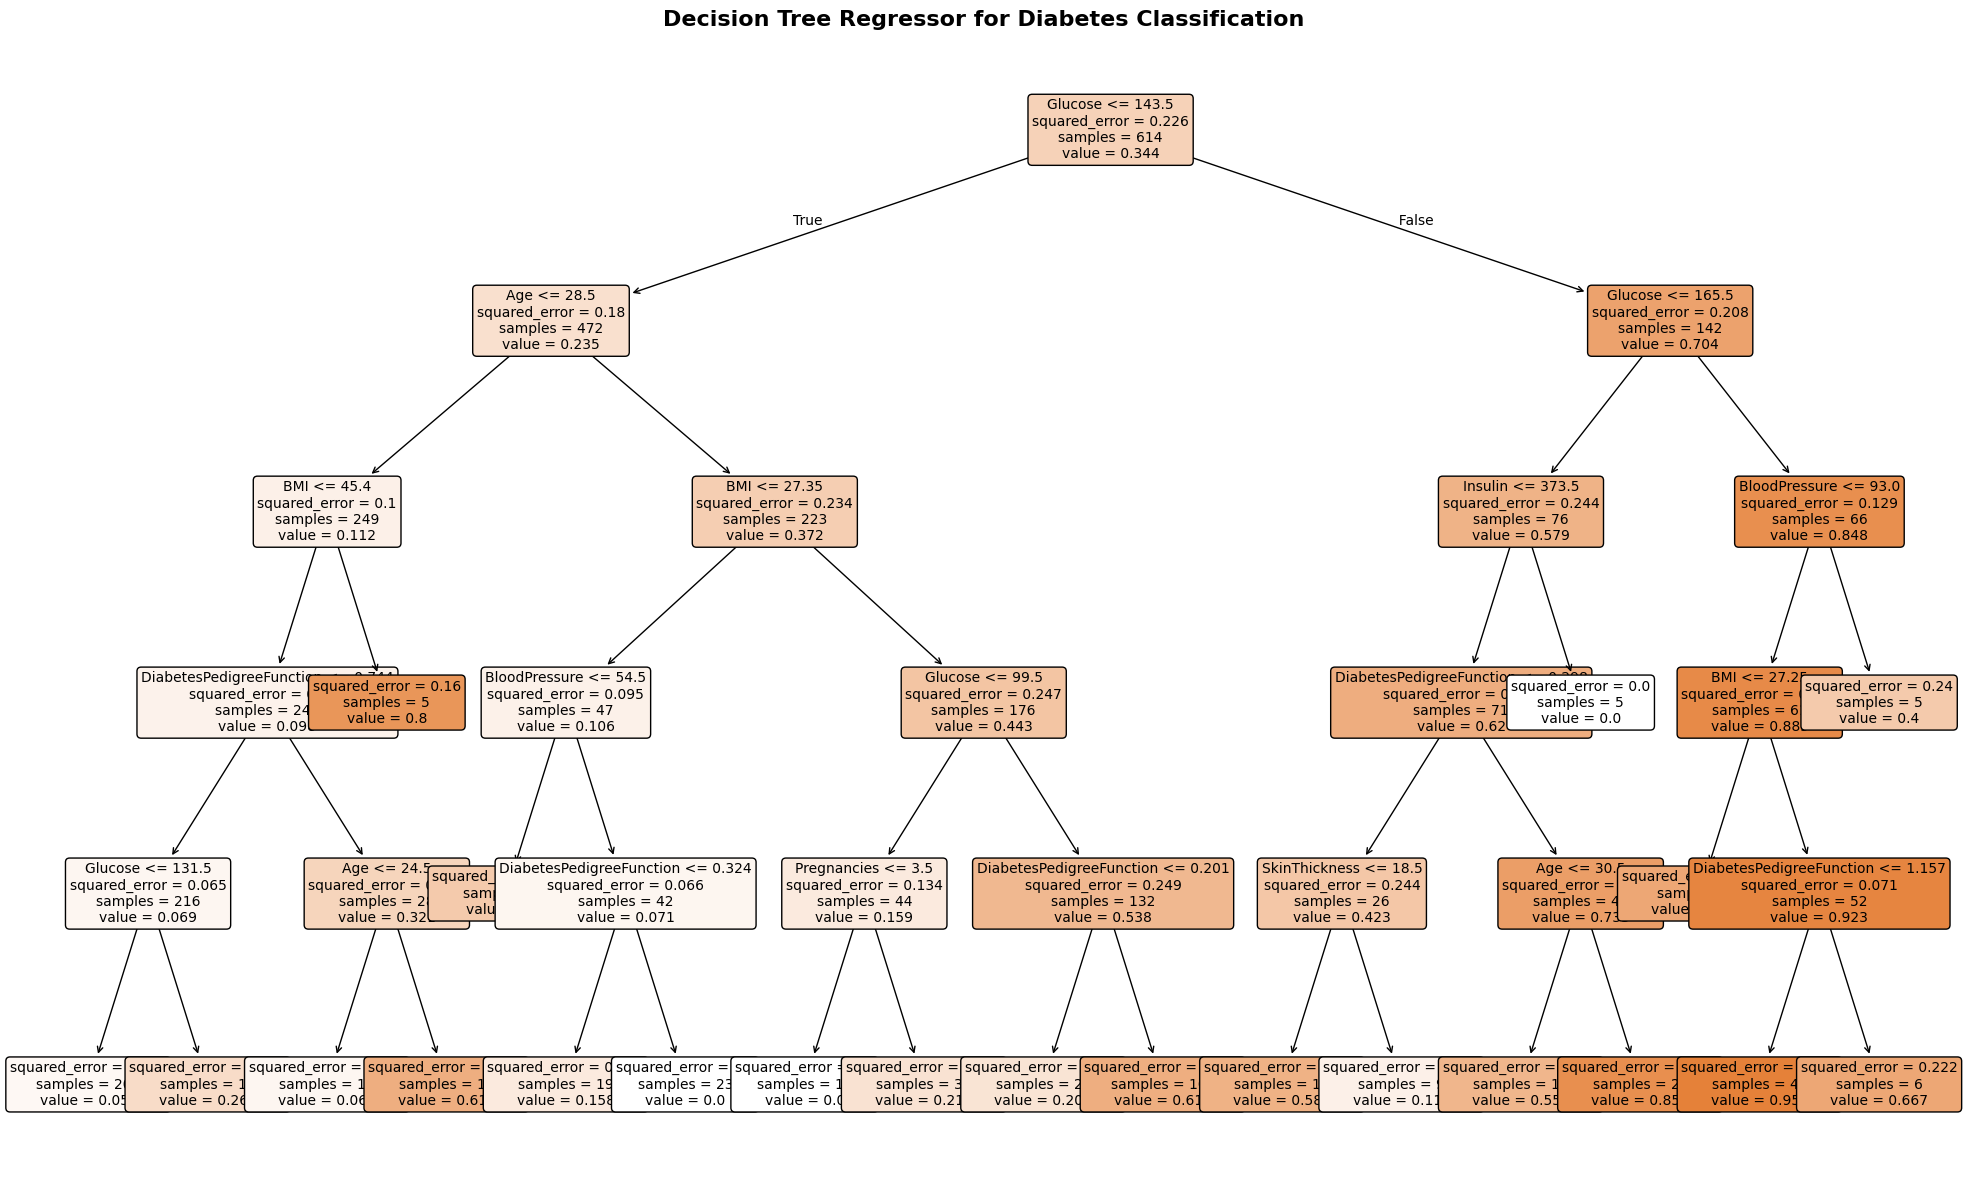

In [11]:
plt.figure(figsize=(20, 12))
plot_tree(
    dt_regressor,
    feature_names=X.columns.tolist(),
    class_names=['No Diabetes', 'Diabetes'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Decision Tree Regressor for Diabetes Classification', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


Feature Importance:
                    Feature  Importance
1                   Glucose    0.513384
7                       Age    0.176495
5                       BMI    0.114493
6  DiabetesPedigreeFunction    0.113317
4                   Insulin    0.028830
2             BloodPressure    0.025240
3             SkinThickness    0.021529
0               Pregnancies    0.006711


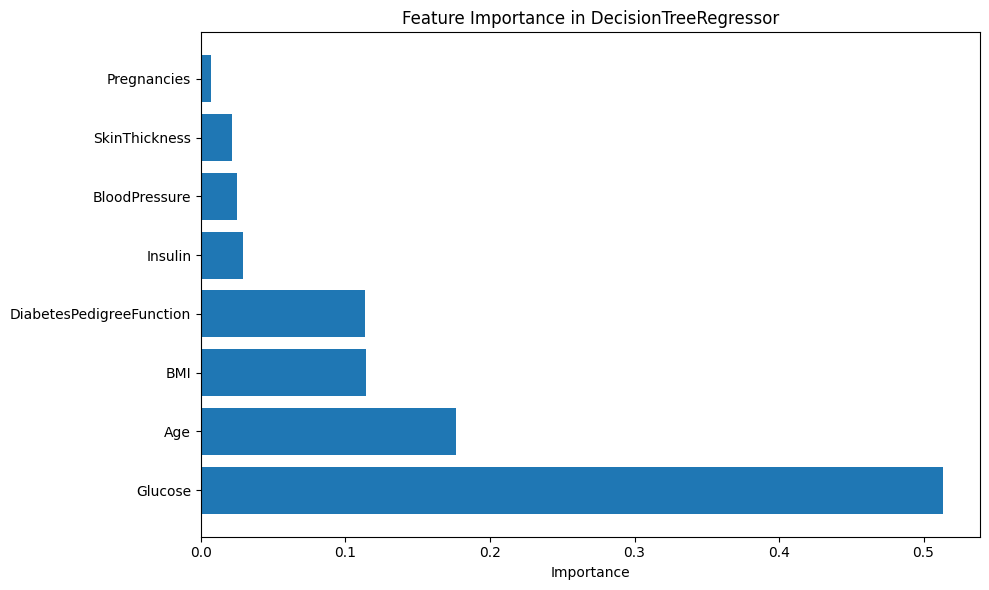

In [12]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_regressor.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in DecisionTreeRegressor')
plt.tight_layout()
plt.show()

# FINAL THOUGHTS
Answer the folowing questions:
- What is the possible benefit of using a regressor instead of a classifier?
    - Probabilistic Output: Provides confidence scores (0-1 values) allowing threshold tuning
    - Flexibility: Can adjust decision threshold based on business needs
    - Interpretability: Regression outputs represent likelihood of positive class
- What drawbacks can you imagine when using a regressor to complete a non-binary classification?
    - Unbounded Predictions: Can predict values outside [0,1] range, requiring manual thresholding
    - Loss Function Mismatch: MSE/MAE doesn't directly optimize classification metrics
    - Imbalanced Data Issues: Performs poorly with imbalanced datasets
    - No Probability Calibration: Doesn't guarantee proper probability estimates

- Which metric do you need to optimize the model for? Accuracy, Precision, Recall, F1? Why?
    - For medical diagnosis like diabetes: RECALL is most important because missing a diagnosis (false negative) has severe health consequences. Minimizing false negatives is critical even if it increases false positives.